In [1]:
# Description: Plot Figure 3 (Jet widt-deformation radius scatterplots).
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        May/2023

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from xarray import open_dataset
from scipy.interpolate import griddata
from hdf5storage import loadmat
from ap_tools.utils import lon180to360
from ap_tools.stats import rsig_student, rci_fisher, arsig

In [3]:
def arsig_student(r0, Ndt, T1, T2, verbose=True):
    r0 = np.abs(r0)
    Tslow = np.maximum(T1, T2) # The effective number of
    edof = Ndt/Tslow           # DoFs is constrained by the
                               # slower-decorrelating variable.
    alphai = 0.51
    issig = True
    while issig and alphai<1.0:
        rsigi = rsig_student(edof, alpha=alphai)
        issig=r0>=rsigi
        alphai+=0.01

    if verbose:
        print("Queried r = %.3f with %.1f EDoF. It is significant at **%.2f** CL."%(r0, edof, alphai))

    return alphai

In [4]:
def get_corrstr(x, y):
    r = np.corrcoef(x, y)[0][1]
    dof = len(x)
    p = arsig_student(r, dof, 1, 1, verbose=True)
    rci_fisher(r, dof, alpha=0.95)
    s = "$r$ = %.2f"%r

    return s

In [5]:
ufrac = 0.5

Lmaxlr = 80
Lmax = 160
head_deriv = "../../data/derived/"
fnames = ["GulfStream33N", "GulfStream34N", "GulfStream36N", "GulfStream37N", "GulfStream38N", "AgulhasCurrent", "EAC29S", "BrazilCurrent29S", "KuroshioCurrent25N", "KuroshioCurrent28p5N", "LMGshfbrk", "SAFjet", "PFjet", "SACCFjet", "GC", "ACsouth", "ACnorth", "BC"]
synop_names = ["BC", "ACsouth", "ACnorth", "GC"]
ACC_names = ["SAFjet", "PFjet", "SACCFjet"]

In [6]:
Ldls_flat, Ldrs_flat, Ldls_surf, Ldrs_surf, Ljls, Ljrs = [], [], [], [], [], []
Ldls_flat_synop, Ldrs_flat_synop, Ldls_surf_synop, Ldrs_surf_synop, Ljls_synop, Ljrs_synop = [], [], [], [], [], []
Ldls_flat_ACC, Ldrs_flat_ACC, Ldls_surf_ACC, Ldrs_surf_ACC, Ljls_ACC, Ljrs_ACC = [], [], [], [], [], []
Ldls_flat_stream, Ldrs_flat_stream, Ldls_surf_stream, Ldrs_surf_stream, Ljls_stream, Ljrs_stream = [], [], [], [], [], []
for f in fnames:
    f = head_deriv + f + ".npz"
    d = np.load(f, allow_pickle=True)
    Ldlsurf, Ldrsurf = d["Ldlsurf"], d["Ldrsurf"]
    Ldlflat, Ldrflat = d["Ldlflat"], d["Ldrflat"]
    Ljl, Ljr = np.abs(d["Ljlufrac"].flatten()[0][ufrac]), np.abs(d["Ljrufrac"].flatten()[0][ufrac])
    
    Ldls_flat.append(Ldlflat)
    Ldrs_flat.append(Ldrflat)
    Ldls_surf.append(Ldlsurf)
    Ldrs_surf.append(Ldrsurf)
    Ljls.append(Ljl)
    Ljrs.append(Ljr)
    
    fshort = f.split("/")[-1].split(".")[0]
    # print(fshort)

    if fshort in synop_names:
        Ldls_flat_synop.append(Ldlflat)
        Ldrs_flat_synop.append(Ldrflat)
        Ldls_surf_synop.append(Ldlsurf)
        Ldrs_surf_synop.append(Ldrsurf)
        Ljls_synop.append(Ljl)
        Ljrs_synop.append(Ljr)
    elif fshort in ACC_names:
        Ldls_flat_ACC.append(Ldlflat)
        Ldrs_flat_ACC.append(Ldrflat)
        Ldls_surf_ACC.append(Ldlsurf)
        Ldrs_surf_ACC.append(Ldrsurf)
        Ljls_ACC.append(Ljl)
        Ljrs_ACC.append(Ljr)
    else:
        Ldls_flat_stream.append(Ldlflat)
        Ldrs_flat_stream.append(Ldrflat)
        Ldls_surf_stream.append(Ldlsurf)
        Ldrs_surf_stream.append(Ldrsurf)
        Ljls_stream.append(Ljl)
        Ljrs_stream.append(Ljr)

### Add Florida Current and East Australian Current from Archer et al. (2018).

In [7]:
dA18_FC = np.load(head_deriv + "digitize_EACFC_Archer_etal2018/FC_archeretal2018.npz", allow_pickle=True)

Ljl_A18FC, Ljr_A18FC = np.abs(dA18_FC["Ljlufrac"].flatten()[0][ufrac]), np.abs(dA18_FC["Ljrufrac"].flatten()[0][ufrac])
Ldl_flat_A18FC, Ldr_flat_A18FC = dA18_FC["Ldlflat"], dA18_FC["Ldrflat"]
Ldl_surf_A18FC, Ldr_surf_A18FC = dA18_FC["Ldlsurf"], dA18_FC["Ldrsurf"]

dA18_EAC = np.load(head_deriv + "digitize_EACFC_Archer_etal2018/EAC_archeretal2018.npz", allow_pickle=True)

Ljl_A18EAC, Ljr_A18EAC = np.abs(dA18_EAC["Ljlufrac"].flatten()[0][ufrac]), np.abs(dA18_EAC["Ljrufrac"].flatten()[0][ufrac])
Ldl_flat_A18EAC, Ldr_flat_A18EAC = dA18_EAC["Ldlflat"], dA18_EAC["Ldrflat"]
Ldl_surf_A18EAC, Ldr_surf_A18EAC = dA18_EAC["Ldlsurf"], dA18_EAC["Ldrsurf"]

In [8]:
Ldls_flat.append(Ldl_flat_A18FC)
Ldrs_flat.append(Ldr_flat_A18FC)
Ldls_surf.append(Ldl_surf_A18FC)
Ldrs_surf.append(Ldr_surf_A18FC)
Ljls.append(Ljl_A18FC)
Ljrs.append(Ljr_A18FC)

Lj_A18FC = Ljl_A18FC + Ljr_A18FC
Ld_flat_A18FC = Ldl_flat_A18FC + Ldr_flat_A18FC
Ld_surf_A18FC = Ldl_surf_A18FC + Ldr_surf_A18FC

Ldls_flat.append(Ldl_flat_A18EAC)
Ldrs_flat.append(Ldr_flat_A18EAC)
Ldls_surf.append(Ldl_surf_A18EAC)
Ldrs_surf.append(Ldr_surf_A18EAC)
Ljls.append(Ljl_A18EAC)
Ljrs.append(Ljr_A18EAC)

Lj_A18EAC = Ljl_A18EAC + Ljr_A18EAC
Ld_flat_A18EAC = Ldl_flat_A18EAC + Ldr_flat_A18EAC
Ld_surf_A18EAC = Ldl_surf_A18EAC + Ldr_surf_A18EAC

### Add Gulf Stream from Rossby & Zhang (2001).

In [9]:
dRZ01_GS = np.load(head_deriv + "digitize_GS_Rossby_Zhang2001/GS_rossbyzhang2001.npz", allow_pickle=True)

Ljl_RSZ01, Ljr_RSZ01 = np.abs(dRZ01_GS["Ljlufrac"].flatten()[0][ufrac]), np.abs(dRZ01_GS["Ljrufrac"].flatten()[0][ufrac])
Ldl_flat_RSZ01, Ldr_flat_RSZ01 = dRZ01_GS["Ldlflat"], dRZ01_GS["Ldrflat"]
Ldl_surf_RSZ01, Ldr_surf_RSZ01 = dRZ01_GS["Ldlsurf"], dRZ01_GS["Ldrsurf"]

Ldls_flat.append(Ldl_flat_RSZ01)
Ldrs_flat.append(Ldr_flat_RSZ01)
Ldls_surf.append(Ldl_surf_RSZ01)
Ldrs_surf.append(Ldr_surf_RSZ01)
Ljls.append(Ljl_RSZ01)
Ljrs.append(Ljr_RSZ01)
Lj_RSZ01 = Ljl_RSZ01 + Ljr_RSZ01
Ld_flat_RSZ01 = Ldl_flat_RSZ01 + Ldr_flat_RSZ01
Ld_surf_RSZ01 = Ldl_surf_RSZ01 + Ldr_surf_RSZ01

In [10]:
Ldls_surf, Ldrs_surf, Ldls_flat, Ldrs_flat, Ljls, Ljrs = map(np.array, (Ldls_surf, Ldrs_surf, Ldls_flat, Ldrs_flat, Ljls, Ljrs))
Lds_surf = Ldls_surf + Ldrs_surf
Lds_flat = Ldls_flat + Ldrs_flat
Ljs = Ljls + Ljrs

Ldls_surf_synop, Ldrs_surf_synop, Ldls_flat_synop, Ldrs_flat_synop, Ljls_synop, Ljrs_synop = map(np.array, (Ldls_surf_synop, Ldrs_surf_synop, Ldls_flat_synop, Ldrs_flat_synop, Ljls_synop, Ljrs_synop))
Lds_surf_synop = Ldls_surf_synop + Ldrs_surf_synop
Lds_flat_synop = Ldls_flat_synop + Ldrs_flat_synop
Ljs_synop = Ljls_synop + Ljrs_synop

Ldls_surf_ACC, Ldrs_surf_ACC, Ldls_flat_ACC, Ldrs_flat_ACC, Ljls_ACC, Ljrs_ACC = map(np.array, (Ldls_surf_ACC, Ldrs_surf_ACC, Ldls_flat_ACC, Ldrs_flat_ACC, Ljls_ACC, Ljrs_ACC))
Lds_surf_ACC = Ldls_surf_ACC + Ldrs_surf_ACC
Lds_flat_ACC = Ldls_flat_ACC + Ldrs_flat_ACC
Ljs_ACC = Ljls_ACC + Ljrs_ACC

Ldls_surf_stream, Ldrs_surf_stream, Ldls_flat_stream, Ldrs_flat_stream, Ljls_stream, Ljrs_stream = map(np.array, (Ldls_surf_stream, Ldrs_surf_stream, Ldls_flat_stream, Ldrs_flat_stream, Ljls_stream, Ljrs_stream))
Lds_surf_stream = Ldls_surf_stream + Ldrs_surf_stream
Lds_flat_stream = Ldls_flat_stream + Ldrs_flat_stream
Ljs_stream = Ljls_stream + Ljrs_stream

### Plot jet width-deformation radius scatterplots for all surface jets.

Queried r = 0.469 with 21.0 EDoF. It is significant at **1.00** CL.

Fisher transform CI (xl,xu): (0.047,0.749)

Queried r = 0.451 with 21.0 EDoF. It is significant at **0.99** CL.

Fisher transform CI (xl,xu): (0.024,0.739)

Queried r = 0.524 with 21.0 EDoF. It is significant at **1.00** CL.

Fisher transform CI (xl,xu): (0.120,0.780)

Queried r = 0.538 with 21.0 EDoF. It is significant at **1.00** CL.

Fisher transform CI (xl,xu): (0.139,0.787)

Queried r = 0.448 with 21.0 EDoF. It is significant at **0.99** CL.

Fisher transform CI (xl,xu): (0.020,0.737)

Queried r = 0.555 with 21.0 EDoF. It is significant at **1.00** CL.

Fisher transform CI (xl,xu): (0.163,0.796)



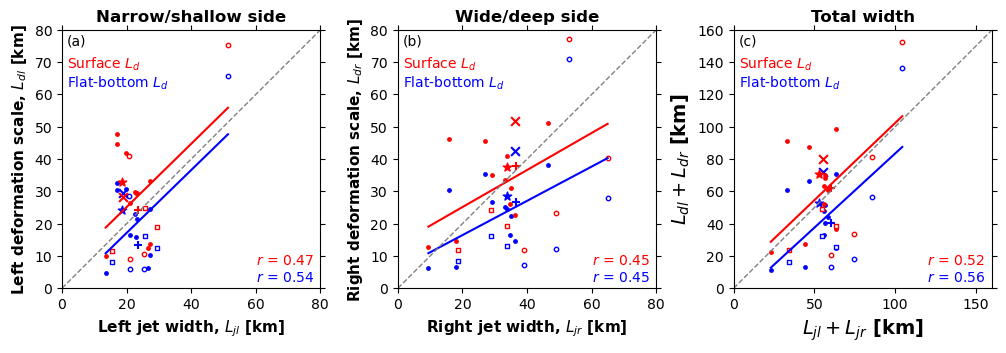

In [11]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 6))
ax1, ax2, ax3 = ax

xLjls = [Ljls.min(), Ljls.max()]
xLjrs = [Ljrs.min(), Ljrs.max()]
xLjs = [Ljs.min(), Ljs.max()]

Ldls_flat_fit = np.polyval(np.polyfit(Ljls, Ldls_flat, 1), xLjls)
Ldrs_flat_fit = np.polyval(np.polyfit(Ljrs, Ldrs_flat, 1), xLjrs)
Lds_flat_fit = np.polyval(np.polyfit(Ljs, Lds_flat, 1), xLjs)

ax1.scatter(Ljls_stream, Ldls_flat_stream, c="b", s=6)
ax2.scatter(Ljrs_stream, Ldrs_flat_stream, c="b", s=6)
ax3.scatter(Ljs_stream, Lds_flat_stream, c="b", s=6)

ax1.scatter(Ljls_synop, Ldls_flat_synop, c="w", s=10, marker="o", edgecolors="b")
ax2.scatter(Ljrs_synop, Ldrs_flat_synop, c="w", s=10, marker="o", edgecolors="b")
ax3.scatter(Ljs_synop, Lds_flat_synop, c="w", s=10, marker="o", edgecolors="b")

ax1.scatter(Ljls_ACC, Ldls_flat_ACC, c="w", s=10, marker="s", edgecolors="b")
ax2.scatter(Ljrs_ACC, Ldrs_flat_ACC, c="w", s=10, marker="s", edgecolors="b")
ax3.scatter(Ljs_ACC, Lds_flat_ACC, c="w", s=10, marker="s", edgecolors="b")

ax1.scatter(Ljl_RSZ01, Ldl_flat_RSZ01, c="b", s=40, marker="*")
ax2.scatter(Ljr_RSZ01, Ldr_flat_RSZ01, c="b", s=40, marker="*")
ax3.scatter(Lj_RSZ01, Ld_flat_RSZ01, c="b", s=40, marker="*")

ax1.scatter(Ljl_A18FC, Ldl_flat_A18FC, c="b", s=40, marker="+")
ax2.scatter(Ljr_A18FC, Ldr_flat_A18FC, c="b", s=40, marker="+")
ax3.scatter(Lj_A18FC, Ld_flat_A18FC, c="b", s=40, marker="+")

ax1.scatter(Ljl_A18EAC, Ldl_flat_A18EAC, c="b", s=40, marker="x")
ax2.scatter(Ljr_A18EAC, Ldr_flat_A18EAC, c="b", s=40, marker="x")
ax3.scatter(Lj_A18EAC, Ld_flat_A18EAC, c="b", s=40, marker="x")

ax1.plot(xLjls, Ldls_flat_fit, "b")
ax2.plot(xLjrs, Ldrs_flat_fit, "b")
ax3.plot(xLjs, Lds_flat_fit, "b")

Ldls_surf_fit = np.polyval(np.polyfit(Ljls, Ldls_surf, 1), xLjls)
Ldrs_surf_fit = np.polyval(np.polyfit(Ljrs, Ldrs_surf, 1), xLjrs)
Lds_surf_fit = np.polyval(np.polyfit(Ljs, Lds_surf, 1), xLjs)

ax1.scatter(Ljls_stream, Ldls_surf_stream, c="r", s=6)
ax2.scatter(Ljrs_stream, Ldrs_surf_stream, c="r", s=6)
ax3.scatter(Ljs_stream, Lds_surf_stream, c="r", s=6)

ax1.scatter(Ljls_synop, Ldls_surf_synop, c="w", s=10, marker="o", edgecolors="r")
ax2.scatter(Ljrs_synop, Ldrs_surf_synop, c="w", s=10, marker="o", edgecolors="r")
ax3.scatter(Ljs_synop, Lds_surf_synop, c="w", s=10, marker="o", edgecolors="r")

ax1.scatter(Ljls_ACC, Ldls_surf_ACC, c="w", s=10, marker="s", edgecolors="r")
ax2.scatter(Ljrs_ACC, Ldrs_surf_ACC, c="w", s=10, marker="s", edgecolors="r")
ax3.scatter(Ljs_ACC, Lds_surf_ACC, c="w", s=10, marker="s", edgecolors="r")

ax1.scatter(Ljl_RSZ01, Ldl_surf_RSZ01, c="r", s=40, marker="*")
ax2.scatter(Ljr_RSZ01, Ldr_surf_RSZ01, c="r", s=40, marker="*")
ax3.scatter(Lj_RSZ01, Ld_surf_RSZ01, c="r", s=40, marker="*")

ax1.scatter(Ljl_A18FC, Ldl_surf_A18FC, c="r", s=40, marker="+")
ax2.scatter(Ljr_A18FC, Ldr_surf_A18FC, c="r", s=40, marker="+")
ax3.scatter(Lj_A18FC, Ld_surf_A18FC, c="r", s=40, marker="+")

ax1.scatter(Ljl_A18EAC, Ldl_surf_A18EAC, c="r", s=40, marker="x")
ax2.scatter(Ljr_A18EAC, Ldr_surf_A18EAC, c="r", s=40, marker="x")
ax3.scatter(Lj_A18EAC, Ld_surf_A18EAC, c="r", s=40, marker="x")

ax1.plot(xLjls, Ldls_surf_fit, "r")
ax2.plot(xLjrs, Ldrs_surf_fit, "r")
ax3.plot(xLjs, Lds_surf_fit, "r")

xy1to1 = [0, Lmax]
ax1.plot(xy1to1, xy1to1, color="gray", linestyle="dashed", linewidth=1)
ax2.plot(xy1to1, xy1to1, color="gray", linestyle="dashed", linewidth=1)
ax3.plot(xy1to1, xy1to1, color="gray", linestyle="dashed", linewidth=1)

xylimlr = (0, Lmaxlr)
xylim = (0, Lmax)
ax1.set_xlabel("Left jet width, $L_{jl}$ [km]", fontsize=11, fontweight="black")
ax2.set_xlabel("Right jet width, $L_{jr}$ [km]", fontsize=11, fontweight="black")
ax3.set_xlabel("$L_{jl} + L_{jr}$ [km]", fontsize=14, fontweight="black")

ax1.set_ylabel("Left deformation scale, $L_{dl}$ [km]", fontsize=11, fontweight="black")
ax2.set_ylabel("Right deformation scale, $L_{dr}$ [km]", fontsize=11, fontweight="black")
ax3.set_ylabel("$L_{dl} + L_{dr}$ [km]", fontsize=14, fontweight="black")

ax1.axis("square"); ax2.axis("square"); ax3.axis("square")
ax1.set_xlim(xylimlr); ax1.set_ylim(xylimlr)
ax2.set_xlim(xylimlr); ax2.set_ylim(xylimlr)
ax3.set_xlim(xylim); ax3.set_ylim(xylim)
ax1.tick_params(top=True, right=True); ax2.tick_params(top=True, right=True); ax3.tick_params(top=True, right=True)
fig.subplots_adjust(wspace=0.3)

xt, yt = 0.75, 0.090
ax1.text(xt, yt, get_corrstr(Ljls, Ldls_surf), color="r", fontsize=10, transform=ax1.transAxes)
ax2.text(xt, yt, get_corrstr(Ljrs, Ldrs_surf), color="r", fontsize=10, transform=ax2.transAxes)
ax3.text(xt, yt, get_corrstr(Ljs, Lds_surf), color="r", fontsize=10, transform=ax3.transAxes)

xt, yt = 0.75, 0.025
ax1.text(xt, yt, get_corrstr(Ljls, Ldls_flat), color="b", fontsize=10, transform=ax1.transAxes)
ax2.text(xt, yt, get_corrstr(Ljrs, Ldrs_flat), color="b", fontsize=10, transform=ax2.transAxes)
ax3.text(xt, yt, get_corrstr(Ljs, Lds_flat), color="b", fontsize=10, transform=ax3.transAxes)

xt, yt = 0.02, 0.94
ax1.text(xt, yt, "(a)", fontsize=10, transform=ax1.transAxes)
ax2.text(xt, yt, "(b)", fontsize=10, transform=ax2.transAxes)
ax3.text(xt, yt, "(c)", fontsize=10, transform=ax3.transAxes)

xt, yt = 0.02, 0.85
ax1.text(xt, yt, "Surface $L_d$", color="r", fontsize=10, transform=ax1.transAxes)
ax2.text(xt, yt, "Surface $L_d$", color="r", fontsize=10, transform=ax2.transAxes)
ax3.text(xt, yt, "Surface $L_d$", color="r", fontsize=10, transform=ax3.transAxes)

xt, yt = 0.02, 0.78
ax1.text(xt, yt, "Flat-bottom $L_d$", color="b", fontsize=10, transform=ax1.transAxes)
ax2.text(xt, yt, "Flat-bottom $L_d$", color="b", fontsize=10, transform=ax2.transAxes)
ax3.text(xt, yt, "Flat-bottom $L_d$", color="b", fontsize=10, transform=ax3.transAxes)

ax1.set_title("Narrow/shallow side", fontsize=12, fontweight="black")
ax2.set_title("Wide/deep side", fontsize=12, fontweight="black")
ax3.set_title("Total width", fontsize=12, fontweight="black");

In [12]:
fig.savefig("fig03.png", bbox_inches="tight", dpi=150)